In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot data

In [2]:
df = pd.read_csv("data/data-changepoint.txt")
print(len(df))
df.head(5)

400


,X,Y
0,1,-0.25
1,2,1.92
2,3,-0.57
3,4,-1.41
4,5,-0.90


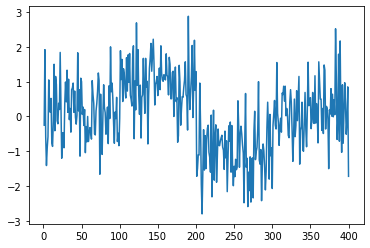

In [3]:
plt.plot(df["X"], df["Y"])

# Run Stan

In [4]:
model = CmdStanModel(stan_file="model/model12-7.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter12/model/model12-7
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter12/model/model12-7


CmdStanModel: name=model12-7
	 stan_file=/workdir/chapter12/model/model12-7.stan
	 exe_file=/workdir/chapter12/model/model12-7
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
data = {
    "T": len(df),
    "Y": df["Y"].values
}

In [6]:
fit = model.sample(data=data, show_progress=True)

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/2000 [00:00<?, ?it/s]

Chain 2 - warmup:   5%|▌         | 100/2000 [00:07<02:15, 14.02it/s]

Chain 3 - warmup:   5%|▌         | 100/2000 [00:07<02:23, 13.21it/s]


Chain 2 - warmup:  10%|█         | 200/2000 [00:11<01:55, 15.53it/s]

Chain 3 - warmup:  10%|█         | 200/2000 [00:13<02:05, 14.37it/s]


Chain 2 - warmup:  15%|█▌        | 300/2000 [00:18<01:48, 15.74it/s]

Chain 3 - warmup:  15%|█▌        | 300/2000 [00:20<02:00, 14.15it/s]


Chain 2 - warmup:  20%|██        | 400/2000 [00:25<01:46, 15.08it/s]

Chain 3 - warmup:  20%|██        | 400/2000 [00:26<01:47, 14.88it/s]


Chain 2 - warmup:  25%|██▌       | 500/2000 [00:31<01:38, 15.19it/s]

Chain 3 - warmup: 

In [7]:
summary = fit.summary()
summary[summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


# Plot result

In [8]:
mu_percentiles = np.percentile(fit.stan_variable("mu"), [2.5, 25.0, 50.0, 75.0, 97.5], axis=0)

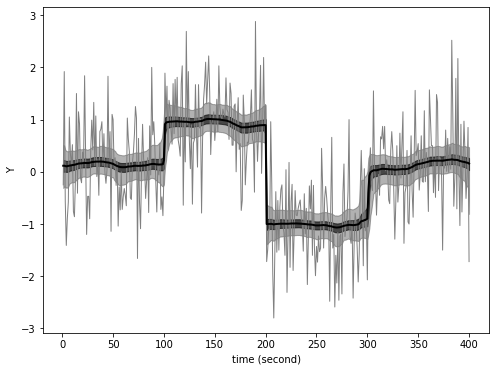

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df["X"].values, df["Y"].values, color='grey', linewidth=1)
ax.fill_between(df["X"].values, mu_percentiles[0], mu_percentiles[4], color='k', alpha=0.3)
ax.fill_between(df["X"].values, mu_percentiles[1], mu_percentiles[3], color='k', alpha=0.6)
ax.plot(df["X"].values, mu_percentiles[2], color="k", linewidth=2)
ax.set_xlabel("time (second)")
ax.set_ylabel("Y")
fig.show()